<a href="https://colab.research.google.com/github/Neissandy/AprendizagemMaquina_atv02/blob/master/Atividade_semana_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de dados de doenças cardiovasculares

Dataset diferente da atividade anterior (semana 1).
link do dataset GitHub: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

 Exercício baseado no passo a passo da aula prática 26/08.

As análises e interpretações dos resultados obtidos estão descritos ao decorrer da atividade.



**Recursos**:
1. Idade | Recurso objetivo | idade | int (dias)
2. Gênero | Recurso objetivo | gênero | código categórico |
3. Altura | Recurso objetivo | altura | int (cm) |
4. Peso | Recurso objetivo | peso | flutuador (kg) |

5. Pressão arterial sistólica | Recurso de exame | ap_hi | int |
6. Pressão arterial diastólica | Recurso de exame | ap_lo | int |
7. Colesterol | Recurso de exame | colesterol | 1: normal, 2: acima do normal, 3: muito acima do normal |
8. Glicose | Recurso de exame | gluc | 1: normal, 2: acima do normal, 3: muito acima do normal |
9. Fumar | Característica subjetiva | fumaça | binário |
10. Ingestão de álcool | Característica subjetiva | alco | binário |
11. Atividade física | Característica subjetiva | ativo | binário |
12. Presença ou ausência de doença cardiovascular | Variável de destino | cardio | binário |

**Objetivo:** Pacientes que apresentam ou não doença cardiovascular.



## 1. Preparando Dados

In [106]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
#lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/cardio_trainTESTE.csv')

In [108]:
#Verificando o dataframe
dados.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [109]:
#Verificando quantidade de linhas e colunas de toda a base de dados
dados.shape

(70000, 13)

In [110]:
#verificando colunas dos dados
dados.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## 2. Limpeza e organização de dados

In [111]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [112]:
#excluir colunas irrelevantes
dados = dados.drop(columns=['id'])
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 3. Análise preliminar dos dados

In [113]:
#Verificando quantos pacientes tem possibilidade de doença cardíaca
print('chance de doença cardíaca:',dados[dados['cardio']==1].shape[0])
print('sem chance de doença cardíaca:',dados[dados['cardio']==0].shape[0])

chance de doença cardíaca: 34979
sem chance de doença cardíaca: 35021


**ANÁLISE:** DATASET BEM DISTRIBUIDO EM RELAÇÃO AOS PACIENTES COM OU SEM DOENÇA CARDÍACA. COMO O EXERCÍCIO ESTÁ FOCADO NO USO DA ÁRVORE DE DECISÃO, AS ANÁLISES PRELIMINARES MAS PROFUNDAS DOS DADOS NÃO FORAM REALIZADAS.

# 6. Realizando re-escala

In [114]:
# Re-escala usando máximo e mínimo
#dados = (dados - dados.min())/(dados.max()-dados.min())

In [115]:
# Verificando dados
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Treinamento de uma árvore de decisão**

Para testar todos os métodos apresentados pelo professor, foram replicados todos os passos da aula prática.


## 1. Organizando dados para modelagem
---



In [116]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:11]
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [117]:
y = dados.cardio
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

**ANÁLISE:** O ATRIBUTO RESPONSÁVEL POR DEFINIR QUAL PACIENTE ESTÁ DOENTE OU NÃO É "cardio",LOCALIZADO NA ÚLTIMA COLUNA DO DARTASET. "cardio" FOI ESCOLHIDA PRA SER "Y".

## 2. Dividir os dados em treino e teste

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [120]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
42893,21780,1,160,87.0,140,80,3,3,0,0,0
36110,15107,1,154,72.0,110,70,1,3,0,0,1
42930,18057,1,160,68.0,120,80,1,1,0,0,1
44936,18205,1,164,96.0,120,80,1,1,0,0,0
27087,19964,1,160,68.0,140,90,1,1,0,0,0


In [121]:
y_train.head()

42893    1
36110    0
42930    0
44936    0
27087    1
Name: cardio, dtype: int64

## 3. Definindo algoritmo de aprendizado

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [124]:
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [125]:
from sklearn.tree import plot_tree

In [126]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (10,10) ##(30,20)

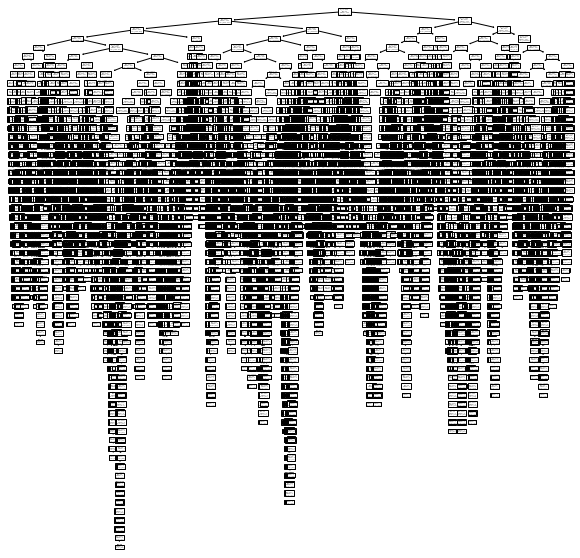

In [127]:
plot_tree(classificador,feature_names=dados.columns[:11])
plt.show()

**ANÁLISE:** ÁRVORE DE DESISÃO ESTÁ BASTANTE EXTENSA EM DECORRÊNCIA DA GRANDE QUANTIDADE DE DADOS: 70000 LINHAS E 13 COLUNAS.

In [128]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([1, 0, 0, ..., 1, 1, 0])

In [129]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

A saída de streaming foi truncada nas últimas 5000 linhas.
1 	 0
0 	 1
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 1
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
0 	 1
1 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
1 	 0
0 	 0
1 	 0
0 	 1
1 	 1
1 	 0
1 	 0
0 	 0
0 	 0
1 	 1
0 	 1
1 	 1
0 	 0
1 	 0
1 	 0
1 	 1
1 	 1
1 	 0
0 	 0
1 	 1
0 	 0
0 	 1
1 	 1
0 	 1
1 	 0
1 	 1
0 	 1
0 	 1
1 	 1
1 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 0
0 	 1
1 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 0
0 	 1
1 	 1
0 	 0
0 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
0 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 1
0 	 0
1 	 0
0 	 0
0 	 0
0 	 0
1 	 0
0 	 0
1 	 0
1 	 1
1 	 0
0 	 0
0 	 1
1 	 1
0 	 0
0 	 0
1 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 1
1 	 1
0 	 1
1 	 1
1 	 1
1 	 0
0 	 0
0 	 0
1 	 1
0 	 0
0 	 1
0 	 1
0 	 0
0 	 1
0 	 1
1 	 1
0 	 0
1 	 1
1 	 0
0 	 0
0 	 0
1 	 0
0 	 1
1 	 0
1 	 1
0 	 1
1 	 1
1 	 0
1 	 1
0 	 1
0 	 0
0 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 1
0 	 1

## 4. Avaliação do classificador

In [130]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [131]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.6345714285714286

In [132]:
#calculando precisão
from sklearn.metrics import precision_score

In [133]:
precisao = precision_score(y_test,classificacao)
precisao

0.6362979031091829

In [134]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [135]:
recall = recall_score(y_test,classificacao)
recall

0.6284816454792173

In [136]:
#calculando f1-score
from sklearn.metrics import f1_score

In [137]:
f1 = f1_score(y_test,classificacao)
f1

0.6323656223052602

**ANÁLISE:** NESSE TIPO DE ANÁLISE DE DADOS QUE SE TRATA DO DIAGNÓSTICO DE PACIÊNTES, O RECALL TORNA-SE MAIS RELEVANTE, OU SEJA, A TAXA DE FALSO NEGATIVO É MAIS PREJUDICIAL. ENTRETANTANDO, PODE-SE OBSERVAR QUE TANTANTO O RECALL COMO A ACURÁCIA E O F1-SCORE DERAM VALORES BAIXOS. UMA TAXA ABAIXO DO IDEAL DE PRECISÃO. PODE SER BEM OBSERVADO VISUALMENTE NA CURVA ROC ABAIXO.

In [138]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [139]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [140]:
fpr

array([0.        , 0.35933705, 1.        ])

In [141]:
tpr

array([0.        , 0.62848165, 1.        ])

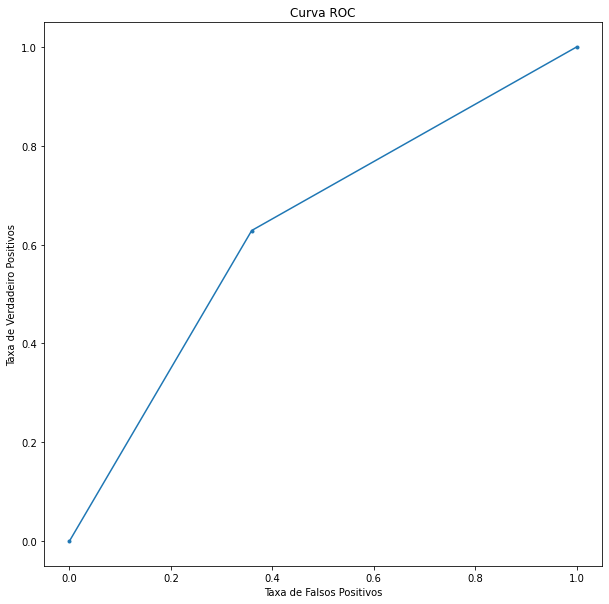

In [142]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## 5. Área sob a curva (Area under the curve - AUC)

In [143]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [144]:
erro = roc_auc_score(y_test,classificacao)
erro

0.6345722986647409

## 6. Validação cruzada

In [145]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [146]:
kf = KFold(n_splits=5)

In [147]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [14000 14001 14002 ... 69997 69998 69999] 
Teste: [    0     1     2 ... 13997 13998 13999]
-----
Treino: [    0     1     2 ... 69997 69998 69999] 
Teste: [14000 14001 14002 ... 27997 27998 27999]
-----
Treino: [    0     1     2 ... 69997 69998 69999] 
Teste: [28000 28001 28002 ... 41997 41998 41999]
-----
Treino: [    0     1     2 ... 69997 69998 69999] 
Teste: [42000 42001 42002 ... 55997 55998 55999]
-----
Treino: [    0     1     2 ... 55997 55998 55999] 
Teste: [56000 56001 56002 ... 69997 69998 69999]
-----


In [148]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [149]:
#define modelo
classificador = DecisionTreeClassifier()

In [150]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.63571429, 0.63242857, 0.63928571, 0.63371429, 0.63985714,
       0.636     , 0.63128571, 0.63528571, 0.62985714, 0.63228571])

In [151]:
scores.mean(),scores.std()

(0.6345714285714286, 0.003123969217753158)

**ANÁLISE:** MESMO USANDO OUTRO MÉTODO DE VALIDAÇÃO MAIS EFICAZ COMO A VALIDAÇÃO CRUZADA, O SCORE AINDA FOI RELATIVAMENTE BAIXO. 

# **Comparando Árvore de Decisão com Random Forest**
Testando o Random Forest.

## 1. Método Holdout

In [152]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [153]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.6341428571428571

In [155]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

0.9997678571428571

**ANÁLISE:** COMPARANDO O SCORE DA ACURÁCIA ENTRE A ARVORE E A FLORESTA É NOTAVÉL UMA GRANDE DIFERENÇA ENTRE AMBAS.

In [156]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [157]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [158]:
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [159]:
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

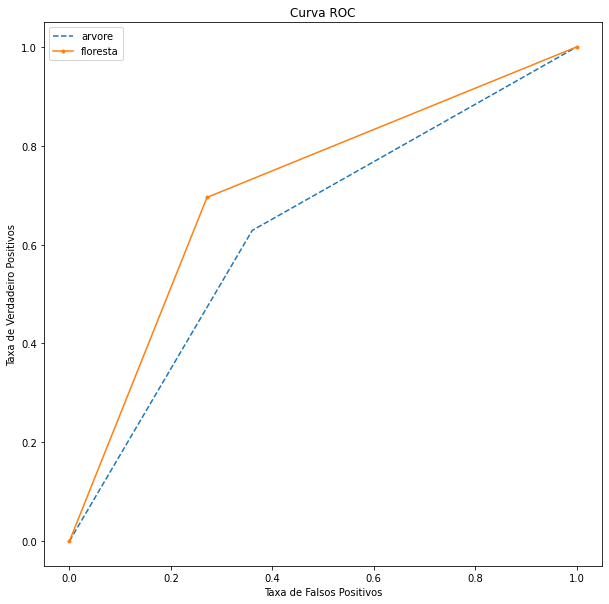

In [160]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**ANÁLISE:** AO ANALISAR O GRÁFICO DA CURVA ROC PARA OS DOIS MÉTODOS, PODEMOS CONCLUIR QUE O ALGORITMO DE CLASSIFICAÇÃO ÁRVORE DE DECISÃO COM RANDOM FOREST É MAIS EFICAZ, APRESENTANDO UM MELHOR RESULTADO NESSE DATASET.

## 2. Validação Cruzada

In [161]:
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.634, 0.004)

In [162]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.716, 0.007)

**ANÁLISE:** APLICANDO A VALIDAÇÃO CRUZADA NA ÁRVORE DE DECISÃO COM RANDOM FOREST ONDE MAIS SE APROXIMA DOS DADOS REAIS, PODEMOS COMPROVAR MAIS UMA VEZ O RESULTADO CITADO ANTERIORMENTE: A ÁRVORE DE DECISÃO COM RANDOM FOREST NESSE EXEMPLO DE DATASET, É MAIZ EFICAZ.